#  Varient views test on model trained on frontal faces - normalized by max value of all types

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

# df = pd.read_csv('/home/administrator/experiments/5_ids_200_img_per_id_val_50/vgg16/results/comparisons_with_fc7_linear.csv')
# df = pd.read_csv('/home/administrator/experiments/high_importance_features_full_dataset/vgg16/results/comparisons.csv')
df = pd.read_csv('/home/administrator/experiments/1000_ids_20_train/vgg16/results/comparisons_with_fc7_linear.csv')

title = '1000_ids_20_train_views'
treshold = 224.775

# df = pd.read_csv(r"/home/administrator/experiments/500_ids_300_img_per_id_2/vgg16/results/100_ids_non_frontal_300_per_id_comparison.csv")
pd.set_option('display.max_rows', df.shape[0]+1)

# print(df)

In [322]:
# change unnamed column to 'pairs'
df = df.rename(columns = {'Unnamed: 0':'pairs'})
df

,pairs,conv5,conv3,fc7,output,conv1,fc8,conv4,conv2,fc6,input,type
0,"('ak_ref.png', 'ba_ref.png')",159.163790,1737.02470,307.965330,244.517550,370.44495,244.517550,610.99400,791.82690,119.258470,176.927380,diff_pairs
1,"('ba_ref.png', 'dd_ref.png')",179.082240,1522.61390,331.920600,299.276400,265.92630,299.276400,630.65770,551.96450,129.999220,142.596950,diff_pairs
2,"('dd_ref.png', 'gc_ref.png')",180.948070,1298.90540,379.995850,348.015660,226.00403,348.015660,571.17035,453.74713,138.979000,118.918950,diff_pairs
3,"('gc_ref.png', 'jb_ref.png')",185.550980,1273.17000,371.141720,307.997960,232.56548,307.997960,564.90265,440.68823,143.967390,137.082900,diff_pairs
4,"('jb_ref.png', 'js_ref.png')",173.302150,1317.35620,379.184080,302.866500,280.26715,302.866500,590.99770,498.34616,140.929580,162.429760,diff_pairs
5,"('js_ref.png', 'md_ref.png')",184.621350,1369.75480,391.494230,364.964500,331.67926,364.964500,606.02790,531.53430,144.035930,225.679430,diff_pairs
6,"('md_ref.png', 'mz_ref.png')",161.970440,1257.69970,308.898830,270.578400,268.13116,270.578400,544.27090,474.54987,128.325820,174.975140,diff_pairs
7,"('mz_ref.png', 'rn_ref.png')",170.621810,1413.24230,363.509030,356.058500,274.33200,356.058500,599.91490,498.64758,132.841310,159.546300,diff_pairs
8,"('rn_ref.png', 'th_ref.png')",147.214890,1401.07950,237.452710,204.770780,281.66046,204.770780,612.34780,562.60565,101.633630,152.516480,diff_pairs
9,"('th_ref.png', 'ak_ref.png')",172.648800,1802.90760,316.814730,304.342560,398.61707,304.342560,704.07245,838.47580,119.651146,201.079940,diff_pairs


In [323]:
#split the tuples to two columns
df_splited = df['pairs'].str.split(',', expand=True)

#adding   
df.insert(loc=0, column='img1', value=df_splited[0] )
df.insert(loc=1, column='img2', value=df_splited[1] )

  
# Dropping old Name columns 
df.drop(columns =["pairs"], inplace = True) 

#change frontal-ref to frontal_ref
df['type'] = df['type'].replace(['frontal-ref'],'frontal_ref')

#change frontal-quarter_left to frontal_quarter_left
df['type'] = df['type'].replace(['frontal-quarter_left'],'frontal_quarter_left')


#change frontal-half_left to frontal_half_left
df['type'] = df['type'].replace(['frontal-half_left'],'frontal_half_left')

In [324]:
df

,img1,img2,conv5,conv3,fc7,output,conv1,fc8,conv4,conv2,fc6,input,type
0,('ak_ref.png','ba_ref.png'),159.163790,1737.02470,307.965330,244.517550,370.44495,244.517550,610.99400,791.82690,119.258470,176.927380,diff_pairs
1,('ba_ref.png','dd_ref.png'),179.082240,1522.61390,331.920600,299.276400,265.92630,299.276400,630.65770,551.96450,129.999220,142.596950,diff_pairs
2,('dd_ref.png','gc_ref.png'),180.948070,1298.90540,379.995850,348.015660,226.00403,348.015660,571.17035,453.74713,138.979000,118.918950,diff_pairs
3,('gc_ref.png','jb_ref.png'),185.550980,1273.17000,371.141720,307.997960,232.56548,307.997960,564.90265,440.68823,143.967390,137.082900,diff_pairs
4,('jb_ref.png','js_ref.png'),173.302150,1317.35620,379.184080,302.866500,280.26715,302.866500,590.99770,498.34616,140.929580,162.429760,diff_pairs
5,('js_ref.png','md_ref.png'),184.621350,1369.75480,391.494230,364.964500,331.67926,364.964500,606.02790,531.53430,144.035930,225.679430,diff_pairs
6,('md_ref.png','mz_ref.png'),161.970440,1257.69970,308.898830,270.578400,268.13116,270.578400,544.27090,474.54987,128.325820,174.975140,diff_pairs
7,('mz_ref.png','rn_ref.png'),170.621810,1413.24230,363.509030,356.058500,274.33200,356.058500,599.91490,498.64758,132.841310,159.546300,diff_pairs
8,('rn_ref.png','th_ref.png'),147.214890,1401.07950,237.452710,204.770780,281.66046,204.770780,612.34780,562.60565,101.633630,152.516480,diff_pairs
9,('th_ref.png','ak_ref.png'),172.648800,1802.90760,316.814730,304.342560,398.61707,304.342560,704.07245,838.47580,119.651146,201.079940,diff_pairs


In [325]:
#reorder columns by layer order
df = df[['img1', 'img2', 'input', 'conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8','type' ]]

In [326]:
#remove  HPS,LPS,SAME type.

# df = df[df.type.str.contains("same_pairs|frontal|diff_pairs")]
df = df[df.type.str.contains("frontal|diff_pairs")]

df1 = df[df.type.str.contains("same_pairs|diff_pairs")]
# df1 = df[df['type'] =='diff_pairs'|df['type']=='same_pairs']
df2 = df1[df1.img1.str.contains("CM")] 
# df3 = df[df['type'] !='diff_pairs'&df['type'] !='same_pairs']
df3 = df[~df.type.str.contains("same_pairs|diff_pairs")]

df = pd.concat([df2,df3])

In [327]:
df

,img1,img2,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8,type
10,('CM46_2.png','Cpict47_set1_0.png'),87.081930,207.92570,460.31200,1189.88260,451.01770,109.181800,69.248474,144.689790,114.369790,diff_pairs
11,('CM47_2.png','Cpict48_set1_0.png'),103.152145,275.33070,586.04456,1312.83370,508.15897,130.740690,88.957985,199.742750,207.834660,diff_pairs
12,('CM48_2.png','Cpic50_set1_0.png'),135.374540,309.26257,637.04987,1447.33580,534.83500,135.542100,92.803450,222.054400,204.965560,diff_pairs
13,('CM50_2.png','Cpic51_set1_0.png'),105.959250,255.80127,526.90580,1167.23000,467.57196,130.978650,100.769120,262.556670,248.898670,diff_pairs
14,('CM51_2.png','Cpic55_set1_0.png'),112.294586,255.24480,557.33830,1326.11570,485.97592,144.224300,119.656906,326.921500,337.830350,diff_pairs
15,('CM55_2.png','Cpict60_set1_0.png'),181.531620,315.54068,613.41750,1436.36180,583.48346,180.956560,139.798780,389.193730,352.669600,diff_pairs
16,('CM60_2.png','Cpict61_set1_0.png'),110.582910,237.74825,504.23804,1220.23730,474.64603,137.866300,105.037300,264.545380,232.699780,diff_pairs
17,('CM61_2.png','Cpict62_set1_0.png'),106.309990,274.05966,575.28296,1159.32410,489.50640,160.189930,132.252530,383.832500,333.926150,diff_pairs
18,('CM62_2.png','Cpict64_set1_0.png'),124.367386,284.58237,597.05150,1370.54710,519.65330,150.139830,117.636734,309.532000,282.762270,diff_pairs
19,('CM64_2.png','Cpict80_set1_0.png'),94.377174,249.20079,534.67780,1279.76120,566.48940,166.162870,127.385100,313.173980,248.221560,diff_pairs


In [328]:
df.reset_index()

,index,img1,img2,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8,type
0,10,('CM46_2.png','Cpict47_set1_0.png'),87.081930,207.92570,460.31200,1189.88260,451.01770,109.181800,69.248474,144.689790,114.369790,diff_pairs
1,11,('CM47_2.png','Cpict48_set1_0.png'),103.152145,275.33070,586.04456,1312.83370,508.15897,130.740690,88.957985,199.742750,207.834660,diff_pairs
2,12,('CM48_2.png','Cpic50_set1_0.png'),135.374540,309.26257,637.04987,1447.33580,534.83500,135.542100,92.803450,222.054400,204.965560,diff_pairs
3,13,('CM50_2.png','Cpic51_set1_0.png'),105.959250,255.80127,526.90580,1167.23000,467.57196,130.978650,100.769120,262.556670,248.898670,diff_pairs
4,14,('CM51_2.png','Cpic55_set1_0.png'),112.294586,255.24480,557.33830,1326.11570,485.97592,144.224300,119.656906,326.921500,337.830350,diff_pairs
5,15,('CM55_2.png','Cpict60_set1_0.png'),181.531620,315.54068,613.41750,1436.36180,583.48346,180.956560,139.798780,389.193730,352.669600,diff_pairs
6,16,('CM60_2.png','Cpict61_set1_0.png'),110.582910,237.74825,504.23804,1220.23730,474.64603,137.866300,105.037300,264.545380,232.699780,diff_pairs
7,17,('CM61_2.png','Cpict62_set1_0.png'),106.309990,274.05966,575.28296,1159.32410,489.50640,160.189930,132.252530,383.832500,333.926150,diff_pairs
8,18,('CM62_2.png','Cpict64_set1_0.png'),124.367386,284.58237,597.05150,1370.54710,519.65330,150.139830,117.636734,309.532000,282.762270,diff_pairs
9,19,('CM64_2.png','Cpict80_set1_0.png'),94.377174,249.20079,534.67780,1279.76120,566.48940,166.162870,127.385100,313.173980,248.221560,diff_pairs


In [329]:
max_value_df = df.max()
max_value_df

img1     ('frontal/aligned/85_set1_0.jpg'
img2              'ref/aligned/85_2.jpg')
input                             308.931
conv1                             706.721
conv2                             1561.86
conv3                             2106.27
conv4                             665.905
conv5                             180.957
fc6                               139.799
fc7                               389.194
fc8                               429.951
type                          frontal_ref
dtype: object

In [330]:
df = df.reset_index(drop=True)
df
df = df.drop(columns=['img1', 'img2'])

In [331]:
normalized_treshold = treshold/max_value_df['fc7']


In [332]:
df
# df['input']= (df['input']/df['input'].max()) 

for x in df.drop(columns=['type']).columns:
    df[x]= (df[x]/df[x].max()) 

In [333]:
#save df to a csv
df.to_csv('csvs/2_ids_views')


In [334]:
df.to_excel("output.xlsx", sheet_name='Sheet_name_1')  

In [335]:
print(df)

       input     conv1     conv2     conv3     conv4     conv5       fc6  \
0   0.281881  0.294212  0.294720  0.564925  0.677300  0.603359  0.495344   
1   0.333900  0.389589  0.375221  0.623299  0.763110  0.722498  0.636329   
2   0.438203  0.437602  0.407878  0.687157  0.803170  0.749031  0.663836   
3   0.342987  0.361955  0.337357  0.554170  0.702160  0.723813  0.720815   
4   0.363494  0.361168  0.356842  0.629605  0.729797  0.797011  0.855922   
5   0.587612  0.446486  0.392747  0.681947  0.876226  1.000000  1.000000   
6   0.357953  0.336410  0.322844  0.579336  0.712783  0.761875  0.751346   
7   0.344122  0.387791  0.368331  0.550416  0.735099  0.885240  0.946021   
8   0.402573  0.402680  0.382269  0.650700  0.780371  0.829701  0.841472   
9   0.305496  0.352616  0.342333  0.607597  0.850705  0.918247  0.911203   
10  0.326712  0.321727  0.322696  0.604547  0.748111  0.826946  0.870550   
11  0.420706  0.400912  0.379020  0.661588  0.800420  0.813997  0.855853   
12  0.480808

In [281]:
#mean of each columns by type of pairs
means_df = df.groupby(['type']).mean()
means_df = means_df.rename_axis("layers", axis="columns")
means_df

layers,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8
type,,,,,,,,,
diff_pairs,0.387467,0.384919,0.364444,0.621718,0.773738,0.790391,0.775807,0.717658,0.635035
frontal_half_left,0.842708,0.902639,0.907307,0.931023,0.916239,0.695601,0.521432,0.426620,0.278041
frontal_quarter_left,0.729969,0.681072,0.690706,0.909323,0.860798,0.549579,0.372849,0.283595,0.196389
frontal_ref,0.342660,0.287721,0.274813,0.538023,0.533036,0.348313,0.253770,0.183665,0.134452


In [282]:
means_df = means_df.transpose()
means_df

type,diff_pairs,frontal_half_left,frontal_quarter_left,frontal_ref
layers,,,,
input,0.387467,0.842708,0.729969,0.342660
conv1,0.384919,0.902639,0.681072,0.287721
conv2,0.364444,0.907307,0.690706,0.274813
conv3,0.621718,0.931023,0.909323,0.538023
conv4,0.773738,0.916239,0.860798,0.533036
conv5,0.790391,0.695601,0.549579,0.348313
fc6,0.775807,0.521432,0.372849,0.253770
fc7,0.717658,0.426620,0.283595,0.183665
fc8,0.635035,0.278041,0.196389,0.134452


In [283]:
means_df.diff_pairs

layers
input    0.387467
conv1    0.384919
conv2    0.364444
conv3    0.621718
conv4    0.773738
conv5    0.790391
fc6      0.775807
fc7      0.717658
fc8      0.635035
Name: diff_pairs, dtype: float64

In [285]:
# means_df = means_df.reindex(['input', 'conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8' ])
# means_df
std = df.groupby(['type']).std()
std = std.transpose()

In [286]:
#combine means and std df to one:
columns = std.columns.copy()
rows =  std.index.copy()
header = pd.MultiIndex.from_product([columns,
                                     ['mean','STD']],
                                    names=['type','mean/STD'])
df_means_std = pd.DataFrame( 
                  index=rows, 
                  columns=header)

df_means_std


type     diff_pairs      frontal_half_left      frontal_quarter_left       \
mean/STD       mean  STD              mean  STD                 mean  STD   
input           NaN  NaN               NaN  NaN                  NaN  NaN   
conv1           NaN  NaN               NaN  NaN                  NaN  NaN   
conv2           NaN  NaN               NaN  NaN                  NaN  NaN   
conv3           NaN  NaN               NaN  NaN                  NaN  NaN   
conv4           NaN  NaN               NaN  NaN                  NaN  NaN   
conv5           NaN  NaN               NaN  NaN                  NaN  NaN   
fc6             NaN  NaN               NaN  NaN                  NaN  NaN   
fc7             NaN  NaN               NaN  NaN                  NaN  NaN   
fc8             NaN  NaN               NaN  NaN                  NaN  NaN   

type     frontal_ref       
mean/STD        mean  STD  
input            NaN  NaN  
conv1            NaN  NaN  
conv2            NaN  NaN  
conv3            NaN  NaN  
conv4            NaN  NaN  
conv5            NaN  NaN  
fc6              NaN  NaN  
fc7              NaN  NaN  
fc8              NaN  NaN

In [287]:
df_means_std[('diff_pairs','mean')] = means_df.diff_pairs.copy()
df_means_std[('diff_pairs','STD')] = std.diff_pairs.copy()

df_means_std[('frontal_half_left','mean')] = means_df.frontal_half_left.copy()
df_means_std[('frontal_half_left','STD')] = std.frontal_half_left.copy()

df_means_std[('frontal_quarter_left','mean')] = means_df.frontal_quarter_left.copy()
df_means_std[('frontal_quarter_left','STD')] = std.frontal_quarter_left.copy()

df_means_std[('frontal_ref','mean')] = means_df.frontal_ref.copy()
df_means_std[('frontal_ref','STD')] = std.frontal_ref.copy()
 


In [288]:
df_means_std 

type     diff_pairs           frontal_half_left            \
mean/STD       mean       STD              mean       STD   
input      0.387467  0.082942          0.842708  0.089431   
conv1      0.384919  0.048254          0.902639  0.055416   
conv2      0.364444  0.035051          0.907307  0.049720   
conv3      0.621718  0.048158          0.931023  0.048068   
conv4      0.773738  0.063773          0.916239  0.057931   
conv5      0.790391  0.101747          0.695601  0.075950   
fc6        0.775807  0.151949          0.521432  0.083405   
fc7        0.717658  0.200204          0.426620  0.111860   
fc8        0.635035  0.218828          0.278041  0.102621   

type     frontal_quarter_left           frontal_ref            
mean/STD                 mean       STD        mean       STD  
input                0.729969  0.076726    0.342660  0.115301  
conv1                0.681072  0.070738    0.287721  0.071263  
conv2                0.690706  0.063900    0.274813  0.059419  
conv3                0.909323  0.050782    0.538023  0.114130  
conv4                0.860798  0.079950    0.533036  0.101723  
conv5                0.549579  0.081730    0.348313  0.065893  
fc6                  0.372849  0.063165    0.253770  0.063756  
fc7                  0.283595  0.069998    0.183665  0.066497  
fc8                  0.196389  0.060058    0.134452  0.043525

In [289]:
plot_kwargs={'grid':True,'figsize':(20,8),
 'fontsize':12}


In [290]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

In [291]:
# ggplot(data=means_df) +\
# geom_smooth(mapping=aes(x=means_df.columns, y=(means_df.index)))

ggplot(means_df, aes(x=means_df.diff_pairs, y=means_df.columns))#, group=means_df.columns, color=means_df.columns))#    geom_line()

PlotnineError: 'Aesthetics must either be length one, or the same length as the data'

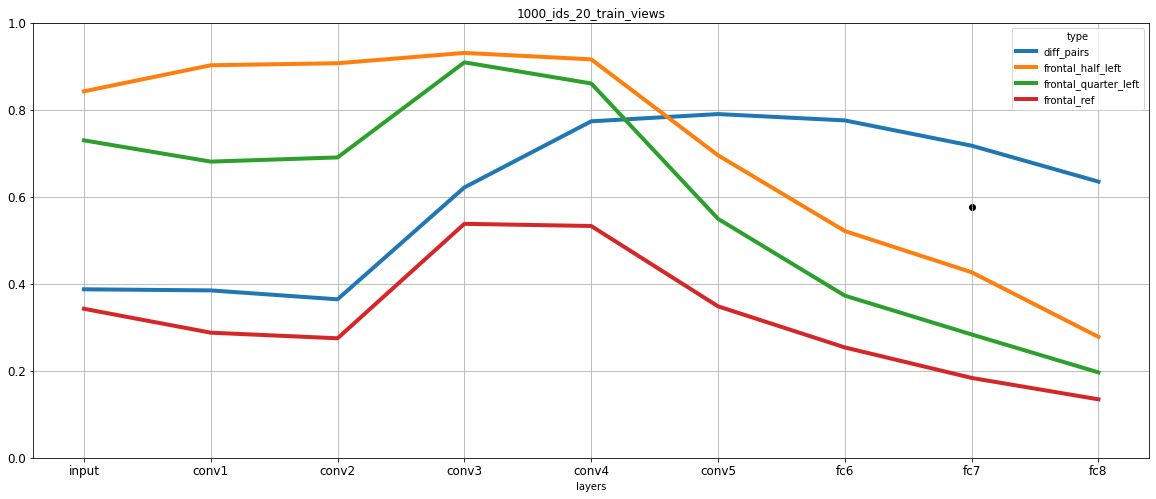

In [337]:
plot = means_df.plot(**plot_kwargs, title = title, ylim = [0,1], lw=4)
plt.scatter(7, normalized_treshold, color='black')
# import plotnine.geoms.geom_ribbon
# geom_ribbon(means_df)
# import rpy2.robjects.packages as packages
# import rpy2.robjects.lib.ggplot2 as ggplot2
# import rpy2.robjects as ro
plt.savefig('plot')

In [299]:
normalized_treshold

0.5775401366306698

In [300]:
df

,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8,type
0,0.281881,0.294212,0.294720,0.564925,0.677300,0.603359,0.495344,0.371768,0.266006,diff_pairs
1,0.333900,0.389589,0.375221,0.623299,0.763110,0.722498,0.636329,0.513222,0.483391,diff_pairs
2,0.438203,0.437602,0.407878,0.687157,0.803170,0.749031,0.663836,0.570550,0.476718,diff_pairs
3,0.342987,0.361955,0.337357,0.554170,0.702160,0.723813,0.720815,0.674617,0.578900,diff_pairs
4,0.363494,0.361168,0.356842,0.629605,0.729797,0.797011,0.855922,0.839997,0.785741,diff_pairs
5,0.587612,0.446486,0.392747,0.681947,0.876226,1.000000,1.000000,1.000000,0.820255,diff_pairs
6,0.357953,0.336410,0.322844,0.579336,0.712783,0.761875,0.751346,0.679727,0.541224,diff_pairs
7,0.344122,0.387791,0.368331,0.550416,0.735099,0.885240,0.946021,0.986225,0.776660,diff_pairs
8,0.402573,0.402680,0.382269,0.650700,0.780371,0.829701,0.841472,0.795316,0.657661,diff_pairs
9,0.305496,0.352616,0.342333,0.607597,0.850705,0.918247,0.911203,0.804674,0.577325,diff_pairs


In [301]:
# df.fc7.groupby(['type'])

In [302]:
std_df = df.groupby(['type']).std()
std_df['fc7']

type
diff_pairs              0.200204
frontal_half_left       0.111860
frontal_quarter_left    0.069998
frontal_ref             0.066497
Name: fc7, dtype: float64